In [2]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.io import fits
from astropy.visualization import ImageNormalize, LinearStretch
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [3]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
hst_fits=fits.open(dic+'HST_MAMMOTH_trim.fits')
img=np.around(hst_fits[0].data,decimals=8)
wcs=WCS(hst_fits[0].header)
norm=ImageNormalize(vmax=0.1,vmin=-1e-3,stretch=LinearStretch())

ly_fits=fits.open(dic+'ly.fits')
heii_fits=fits.open(dic+'heii.fits')
civ_fits=fits.open(dic+'civ.fits')
lycontourwcs=WCS(ly_fits[0].header)
lycontourwcs=lycontourwcs.dropaxis(2)
heiicontourwcs=WCS(heii_fits[0].header)
heiicontourwcs=heiicontourwcs.dropaxis(2)
civcontourwcs=WCS(civ_fits[0].header)
civcontourwcs=civcontourwcs.dropaxis(2)
contourwcs=[lycontourwcs,heiicontourwcs,civcontourwcs]
fits_file=[ly_fits,heii_fits,civ_fits]
Levels=[[5,9,18,30,42,51],[3,5,9],[3.8,7,9]]
linewid=[1.1,1.3,1.3]

In [4]:
sourceb=np.array([[82,212],[83.5,228],[88,183],[98,212]])
gsources=np.array([[42,305],[32,183],[182,258],[189,112],[210,185]])
name=['G-1','G-3','G-5','G-4','G-6']

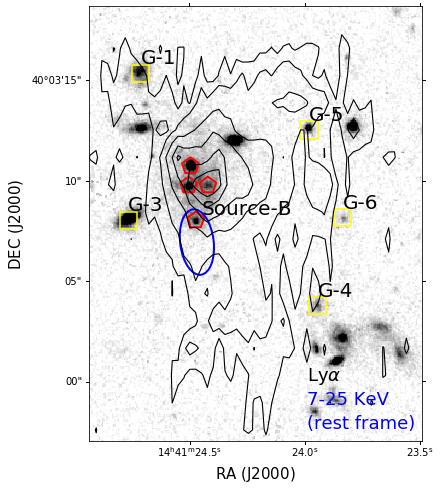

In [6]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
ax=plt.subplot(projection=wcs)
ax.imshow(img,norm=norm,cmap='gray_r')
color=['black','forestgreen','cornflowerblue','darkred']
label=[r'Ly$\alpha$','HeII','CIV',r'H$\alpha$']
for i in range(4):
    ax.scatter(*sourceb[i],transform=ax.get_transform(wcs),
               color='red',marker='p',facecolors='none',s=300,linewidths=2)
for i in range(5):
    ax.scatter(*gsources[i],transform=ax.get_transform(wcs),
               color='yellow',marker='s',facecolors='none',s=300,linewidths=1.5)
    ax.text(*gsources[i]+np.array([0,8]),name[i],color='black',fontsize=20)
ax.text(*sourceb[-2]+np.array([5,5]),'Source-B',
        color='black',fontsize=20)
    
ax.contour(ly_fits[0].data,transform=ax.get_transform(lycontourwcs),
           levels=Levels[0],colors='black',linewidths=1.1)

ellipce=Ellipse((88.899057,164.88498),54.7,27.833334,angle=97.0247,
                color='blue',fill=False,lw=2)
ax.add_patch(ellipce)


ax.text(180,50,r'Ly$\alpha$',color='black',fontsize=18)
ax.text(180,30,'7-25 KeV',color='blue',fontsize=18)#(rest frame)
ax.text(180,10,'(rest frame)',color='blue',fontsize=18)
ax.set_xlabel(r'$\rm RA \ (J2000)$',fontsize=15)
ax.set_ylabel(r'$\rmDEC \ (J2000)$',fontsize=15)
plt.rcParams['figure.figsize'] = [8, 8]
# plt.show()
plt.savefig(dic+'x_ray_ly_contour.png',dpi=300)

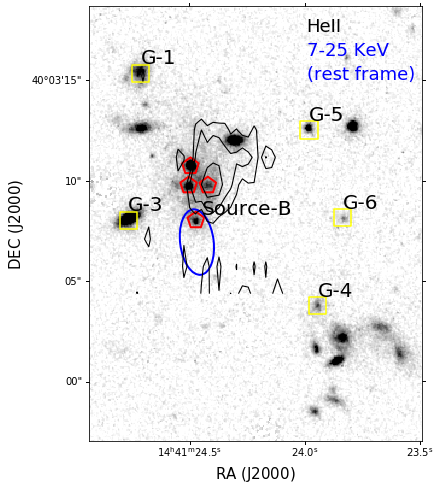

In [7]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
ax=plt.subplot(projection=wcs)
ax.imshow(img,norm=norm,cmap='gray_r')
color=['black','forestgreen','cornflowerblue','darkred']
label=[r'Ly$\alpha$','HeII','CIV',r'H$\alpha$']
for i in range(4):
    ax.scatter(*sourceb[i],transform=ax.get_transform(wcs),
               color='red',marker='p',facecolors='none',s=300,linewidths=2)
for i in range(5):
    ax.scatter(*gsources[i],transform=ax.get_transform(wcs),
               color='yellow',marker='s',facecolors='none',s=300,linewidths=1.5)
    ax.text(*gsources[i]+np.array([0,8]),name[i],color='black',fontsize=20)
ax.text(*sourceb[-2]+np.array([5,5]),'Source-B',
        color='black',fontsize=20)
    
ax.contour(heii_fits[0].data,transform=ax.get_transform(heiicontourwcs),
           levels=Levels[1],colors='black',linewidths=1.1)

ellipce=Ellipse((88.899057,164.88498),54.7,27.833334,angle=97.0247,
                color='blue',fill=False,lw=2)
ax.add_patch(ellipce)


ax.text(180,340,'HeII',color='black',fontsize=18)
ax.text(180,320,'7-25 KeV',color='blue',fontsize=18)
ax.text(180,300,'(rest frame)',color='blue',fontsize=18)

ax.set_xlabel(r'$\rm RA \ (J2000)$',fontsize=15)
ax.set_ylabel(r'$\rmDEC \ (J2000)$',fontsize=15)
plt.rcParams['figure.figsize'] = [8, 8]
# plt.show()
plt.savefig(dic+'x_ray_heii_contour.png',dpi=300)

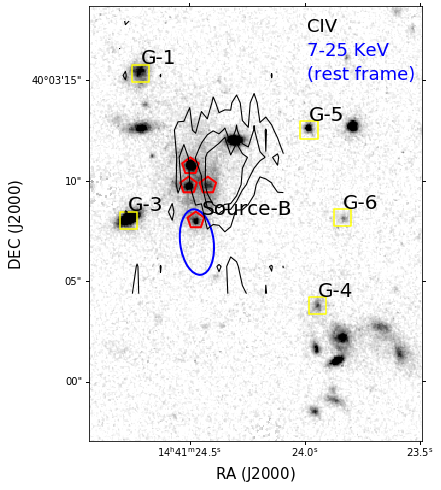

In [9]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
ax=plt.subplot(projection=wcs)
ax.imshow(img,norm=norm,cmap='gray_r')
color=['black','forestgreen','cornflowerblue','darkred']
label=[r'Ly$\alpha$','HeII','CIV',r'H$\alpha$']
for i in range(4):
    ax.scatter(*sourceb[i],transform=ax.get_transform(wcs),
               color='red',marker='p',facecolors='none',s=300,linewidths=2)
for i in range(5):
    ax.scatter(*gsources[i],transform=ax.get_transform(wcs),
               color='yellow',marker='s',facecolors='none',s=300,linewidths=1.5)
    ax.text(*gsources[i]+np.array([0,8]),name[i],color='black',fontsize=20)
ax.text(*sourceb[-2]+np.array([5,5]),'Source-B',
        color='black',fontsize=20)
    
ax.contour(civ_fits[0].data,transform=ax.get_transform(heiicontourwcs),
           levels=Levels[2],colors='black',linewidths=1.1)

ellipce=Ellipse((88.899057,164.88498),54.7,27.833334,angle=97.0247,
                color='blue',fill=False,lw=2)
ax.add_patch(ellipce)


ax.text(180,340,'CIV',color='black',fontsize=18)
ax.text(180,320,'7-25 KeV',color='blue',fontsize=18)
ax.text(180,300,'(rest frame)',color='blue',fontsize=18)

ax.set_xlabel(r'$\rm RA \ (J2000)$',fontsize=15)
ax.set_ylabel(r'$\rmDEC \ (J2000)$',fontsize=15)
plt.rcParams['figure.figsize'] = [8, 8]
# plt.show()
plt.savefig(dic+'x_ray_civ_contour.png',dpi=300)